Name:srikanth kadiyala

### Problem Statement


House price predection


## <div id="toc">Table of Contents</div>
<ol>
<li><a href="#ImportLibraries" style="text-decoration:none">Import Packages</a></li>
<li><a href="#LoadDataset" style="text-decoration:none">Load Dataset</a></li>
<li><a href="#EDA" style="text-decoration:none">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#ModelSelection" style="text-decoration:none">Model Selection and Evaluation</a></li>
</ol>

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

#### <div id="ImportLibraries">1. Importing the required packages <a href="#toc" style="text-decoration:none">[ Top ]</a></div>

In [2]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#### <div id="LoadDataset">2. Load Dataset <a href="#toc" style="text-decoration:none">[ Top ]</a></div>

In [3]:
df=pd.read_csv('C:\\Users\\srika\\OneDrive\\Desktop\\3-2\\BHARATH INTERN\\Housing.csv')

In [4]:
df

,price,area,bedrooms,bathrooms,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,no,no,yes,2,furnished
1,12250000,8960,4,4,no,no,yes,3,furnished
2,12250000,9960,3,2,no,yes,no,2,semi-furnished
3,12215000,7500,4,2,no,yes,yes,3,furnished
4,11410000,7420,4,1,yes,yes,yes,2,furnished
...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,no,yes,no,2,unfurnished
541,1767150,2400,3,1,no,no,no,0,semi-furnished
542,1750000,3620,2,1,no,no,no,0,unfurnished
543,1750000,2910,3,1,no,no,no,0,furnished


#### <div id="EDA">3. Exploratory Data Analysis (EDA) <a href="#toc" style="text-decoration:none">[ Top ]</a></div>

In [5]:
df.head()

,price,area,bedrooms,bathrooms,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,no,no,yes,2,furnished
1,12250000,8960,4,4,no,no,yes,3,furnished
2,12250000,9960,3,2,no,yes,no,2,semi-furnished
3,12215000,7500,4,2,no,yes,yes,3,furnished
4,11410000,7420,4,1,yes,yes,yes,2,furnished


In [6]:
df.tail()

,price,area,bedrooms,bathrooms,guestroom,basement,airconditioning,parking,furnishingstatus
540,1820000,3000,2,1,no,yes,no,2,unfurnished
541,1767150,2400,3,1,no,no,no,0,semi-furnished
542,1750000,3620,2,1,no,no,no,0,unfurnished
543,1750000,2910,3,1,no,no,no,0,furnished
544,1750000,3850,3,1,no,no,no,0,unfurnished


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   guestroom         545 non-null    object
 5   basement          545 non-null    object
 6   airconditioning   545 non-null    object
 7   parking           545 non-null    int64 
 8   furnishingstatus  545 non-null    object
dtypes: int64(5), object(4)
memory usage: 38.4+ KB


In [9]:
df.corr()

,price,area,bedrooms,bathrooms,parking
price,1.000000,0.535997,0.366494,0.517545,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.177496
parking,0.384394,0.352980,0.139270,0.177496,1.000000


In [10]:
cols = df.select_dtypes(include=['object']).columns.tolist()
cols

['guestroom', 'basement', 'airconditioning', 'furnishingstatus']

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cols: 
    # Encode values in training set
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [12]:
df

,price,area,bedrooms,bathrooms,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,0,0,1,2,0
1,12250000,8960,4,4,0,0,1,3,0
2,12250000,9960,3,2,0,1,0,2,1
3,12215000,7500,4,2,0,1,1,3,0
4,11410000,7420,4,1,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,0,1,0,2,2
541,1767150,2400,3,1,0,0,0,0,1
542,1750000,3620,2,1,0,0,0,0,2
543,1750000,2910,3,1,0,0,0,0,0


In [13]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
guestroom           0
basement            0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

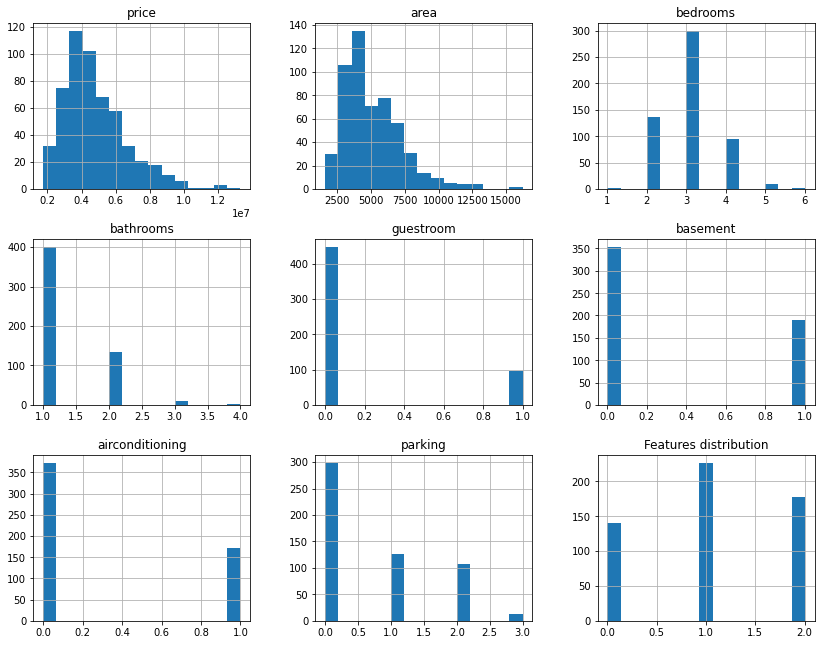

In [14]:
df.hist(figsize = (14,11), bins = 15)
plt.title('Features distribution')
plt.show()

<AxesSubplot:xlabel='area', ylabel='Count'>

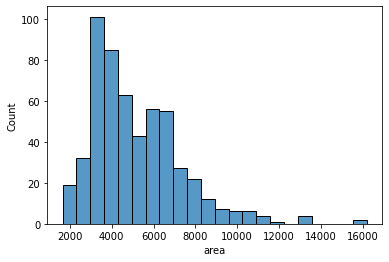

In [15]:
sns.histplot(x='area',data=df)

<AxesSubplot:xlabel='area', ylabel='parking'>

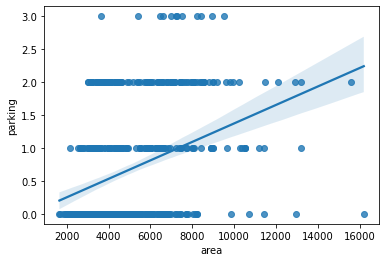

In [16]:
sns.regplot(x='area',y='parking',data=df)

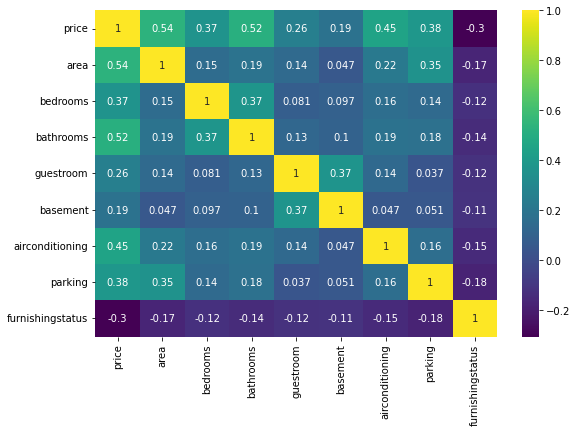

In [17]:
plt.figure(figsize=(9,6))
sns.heatmap(data=df.corr(),cmap='viridis',annot=True)
plt.show()

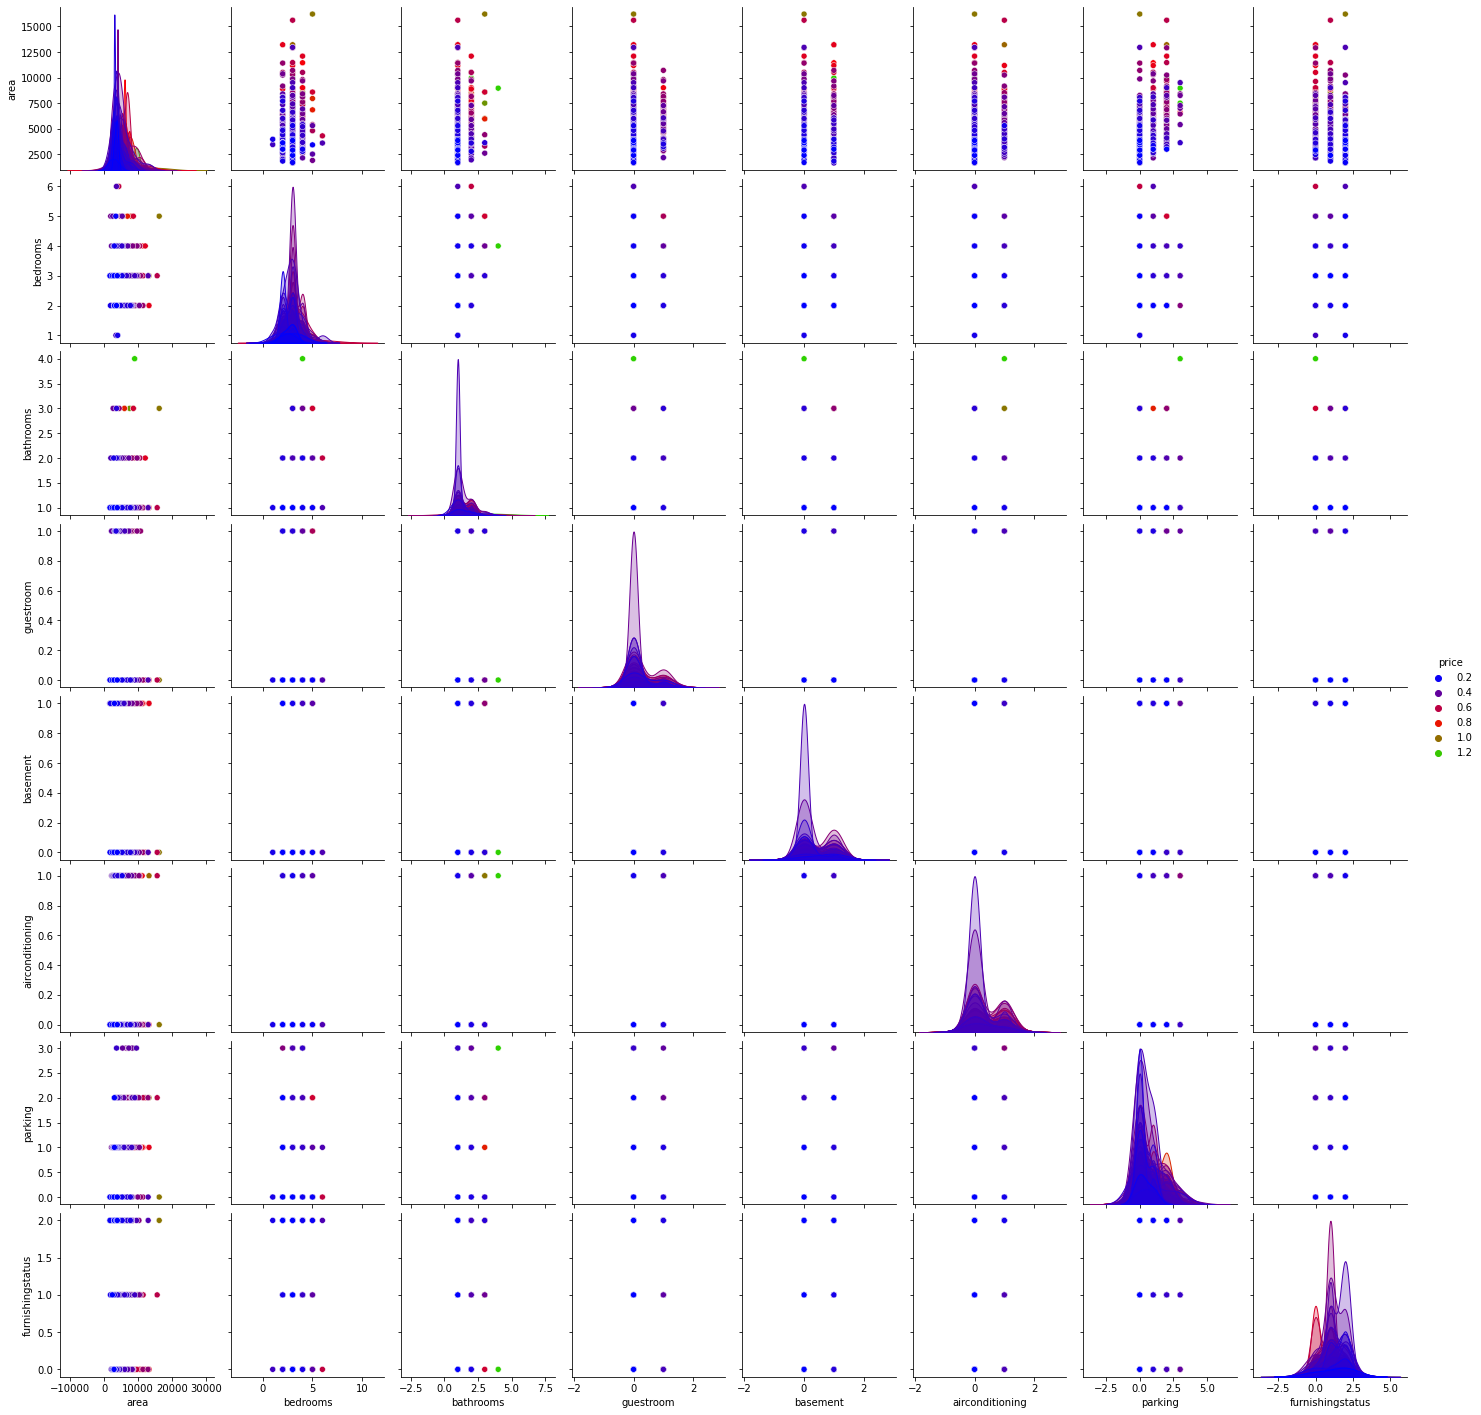

In [18]:
sns.pairplot (df, hue= 'price', palette="brg") 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

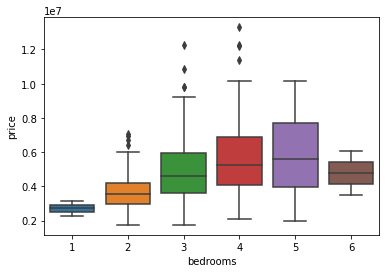

In [56]:
sns.boxplot(x='bedrooms',y='price',data=df)

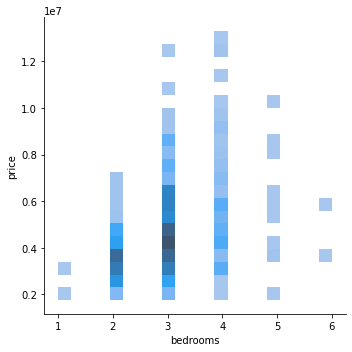

In [57]:
sns.displot(x='bedrooms',y='price',data=df)

#### <div id="ModelSelection">4. Model Selection and Evaluation <a href="#toc" style="text-decoration:none">[ Top ]</a>

In [19]:
x = df.drop(['price'], axis  = 'columns')
y=df[['price']]

In [20]:
x

,area,bedrooms,bathrooms,guestroom,basement,airconditioning,parking,furnishingstatus
0,7420,4,2,0,0,1,2,0
1,8960,4,4,0,0,1,3,0
2,9960,3,2,0,1,0,2,1
3,7500,4,2,0,1,1,3,0
4,7420,4,1,1,1,1,2,0
...,...,...,...,...,...,...,...,...
540,3000,2,1,0,1,0,2,2
541,2400,3,1,0,0,0,0,1
542,3620,2,1,0,0,0,0,2
543,2910,3,1,0,0,0,0,0


In [21]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg=LinearRegression()

In [47]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [48]:
reg.fit(x,y)

LinearRegression()

In [49]:
reg.coef_

array([[ 2.76892886e+02,  2.95548418e+05,  1.14377813e+06,
         4.12411982e+05,  2.59396192e+05,  1.01500207e+06,
         2.89988884e+05, -2.75142318e+05]])

In [50]:
reg.intercept_

array([601624.06931106])

In [51]:
reg.score(x,y)

0.6077296260983833

In [52]:
reg.predict([[3424,2,3,1,2,1,2,1]])

array([[7823178.43055101]])

In [53]:
reg.predict([[4333,1,3,2,1,2,3,1]])

array([[9237332.3901536]])